In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
file_path = "dataset_med.csv"  # Update path if needed
df = pd.read_csv(file_path)

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

In [9]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Use median for numerical
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Mode for categorical

In [10]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

In [11]:
if 'diagnosis_date' in df.columns and 'end_treatment_date' in df.columns:
    df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce')
    df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce')

In [12]:
df['diagnosis_date'] = df['diagnosis_date'].fillna(df['diagnosis_date'].mode()[0])

In [14]:
df['treatment_duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days
df.drop(['diagnosis_date', 'end_treatment_date'], axis=1, inplace=True)

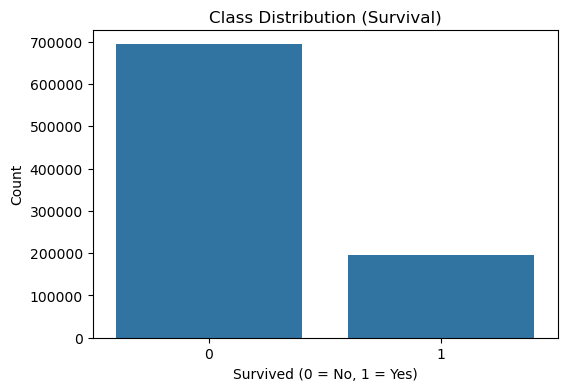

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['survived'])
plt.title("Class Distribution (Survival)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

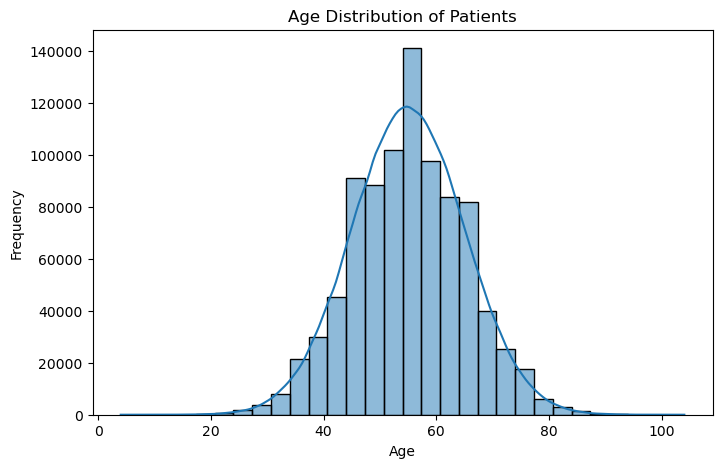

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

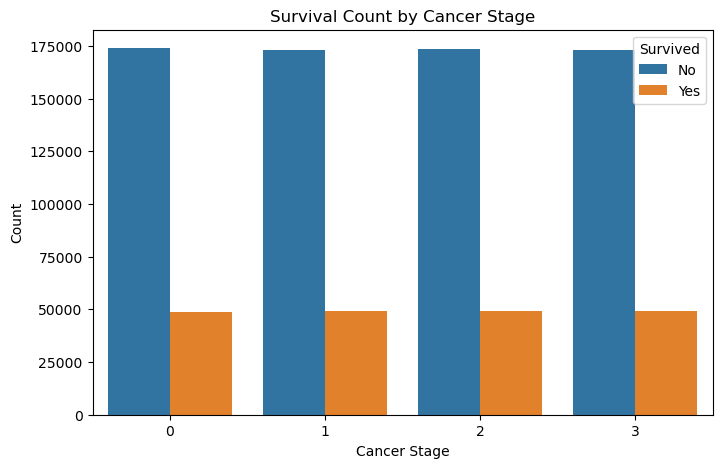

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x="cancer_stage", hue="survived", data=df)
plt.title("Survival Count by Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

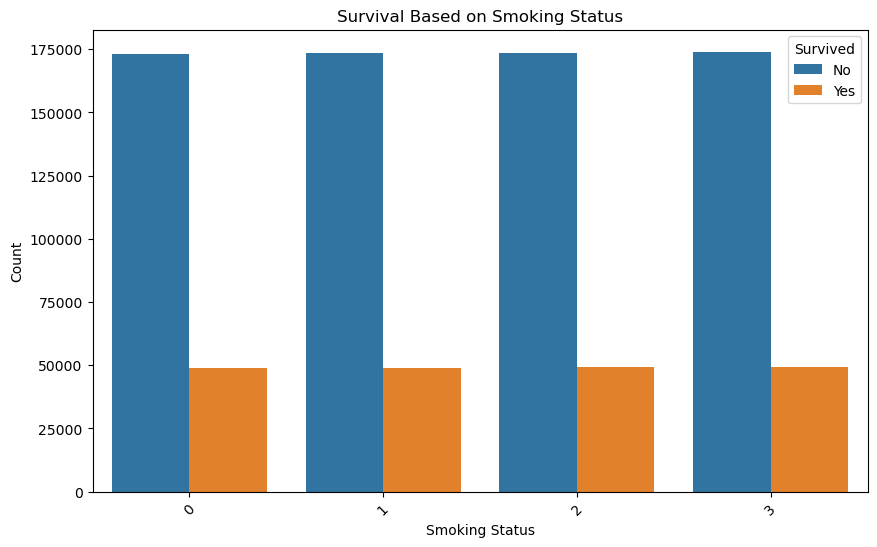

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", hue="survived", data=df)
plt.title("Survival Based on Smoking Status")
plt.xticks(rotation=45)
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

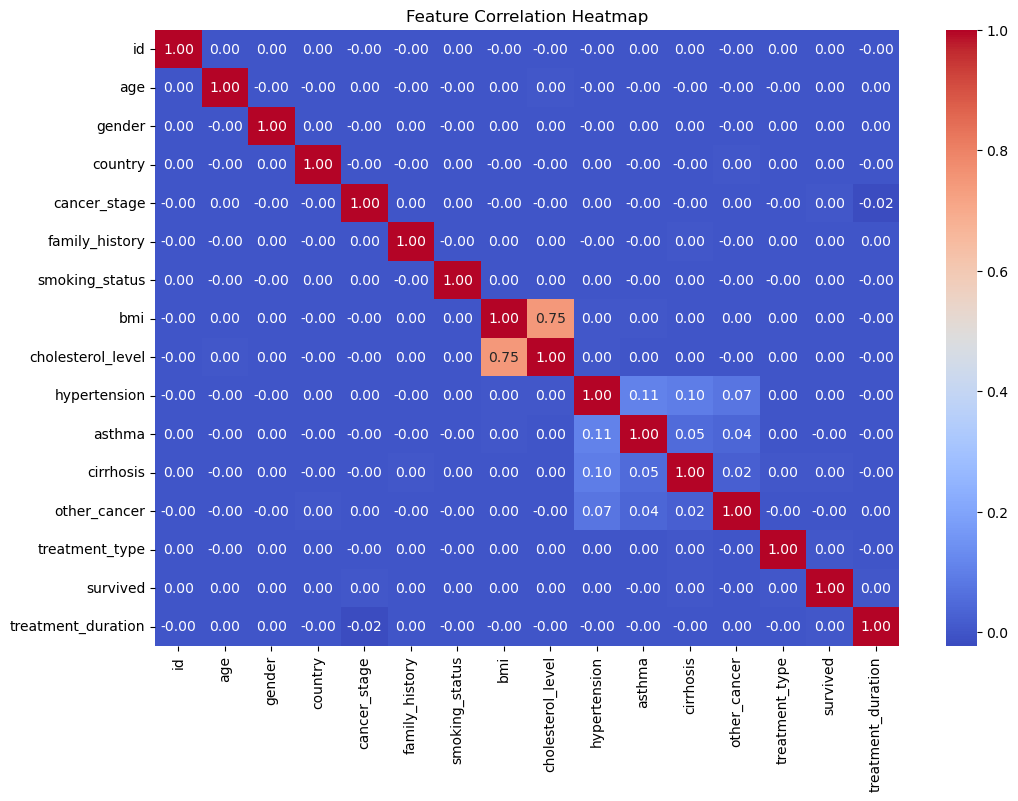

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [32]:
X = df.drop(['id', 'survived'], axis=1)
y = df['survived']

In [34]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7776292134831461
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87    138639
           1       0.25      0.00      0.01     39361

    accuracy                           0.78    178000
   macro avg       0.51      0.50      0.44    178000
weighted avg       0.66      0.78      0.68    178000



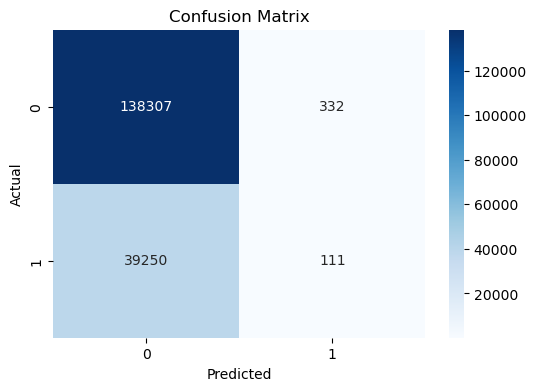

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

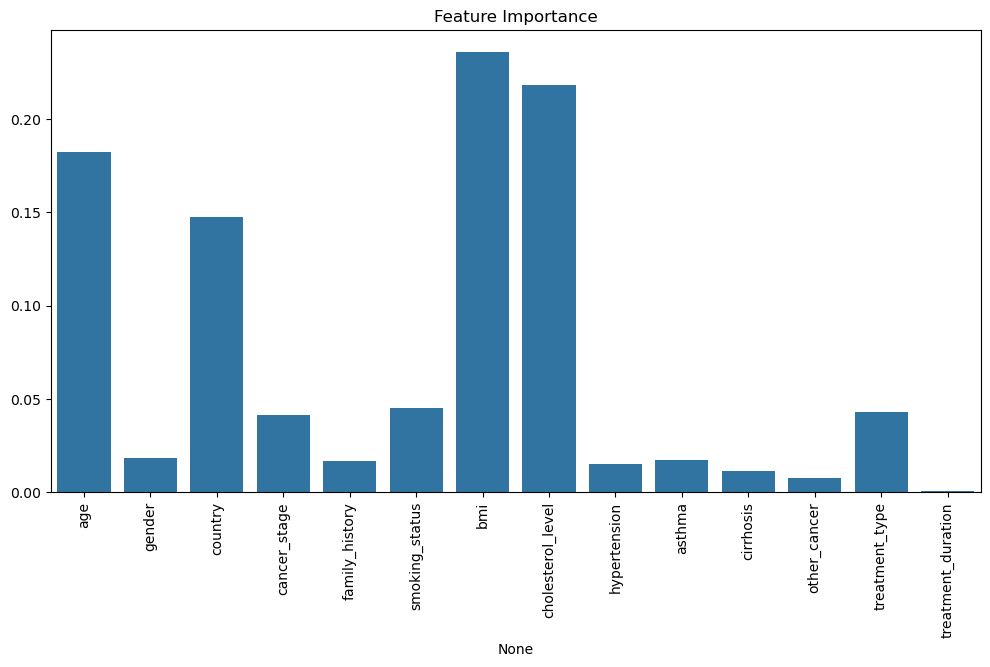

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=model.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()